In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

import warnings
warnings.filterwarnings('ignore')

In [2]:
from astropology.distance import bottleneck_distance, wasserstein_distance
from astropology.series import pd_from_distance_matrix
from astropology.series import sparse_matrix_serie


In [22]:
def add_noise(y: np.array, noise_amplitudes: np.array) -> np.array:

    n_points = y.size
    n_entries = noise_amplitudes.size
    
    y_noisy = np.zeros((n_entries, n_points))

    for idx, y_noise in enumerate(y_noisy):
        y_noise[:] = noise_amplitudes[idx] * np.random.randn(n_points) + y

    return y_noisy

def change_cadence(serie: np.array, percentage: float):

    assert percentage <= 1

    cadence = serie.size *(1 - percentage)
    cadence = int(cadence)

    new_serie = np.random.choice(serie, size=cadence, replace=False)

    return new_serie

In [4]:
n_points = 2000
t = np.linspace(0, 5, n_points)
serie = np.cos(2*np.pi*t) + t
noise_amplitudes = np.logspace(-3, 0, 100)
noisy_series = add_noise(serie, noise_amplitudes)

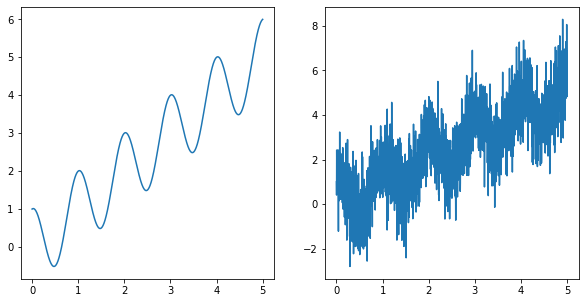

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axs[0].plot(t, serie)
axs[1].plot(t, noisy_series[-1])

In [6]:
# dm -> distance_matrix
w_distances = []
b_distances = []
pdgms = []
dm_a = sparse_matrix_serie(serie)
pdgm_a = pd_from_distance_matrix(dm_a)
pdgm_a = pdgm_a[np.isfinite(pdgm_a[:, 1]), :]

for noisy_serie in noisy_series:
    dm_b = sparse_matrix_serie(noisy_serie)
    pdgm_b = pd_from_distance_matrix(dm_b)
    pdgm_b = pdgm_b[np.isfinite(pdgm_b[:, 1]), :]
    pdgms.append(pdgm_b)
    w_distances.append(wasserstein_distance(pdgm_a, pdgm_b))
    b_distances.append(bottleneck_distance(pdgm_a, pdgm_b))

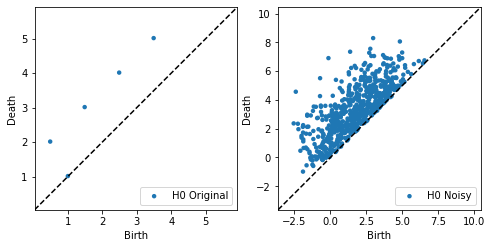

In [9]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_diagrams(pdgm_a, labels = ['H0 Original'])
plt.subplot(122)
plot_diagrams(pdgms[-1], labels = ['H0 Noisy'])


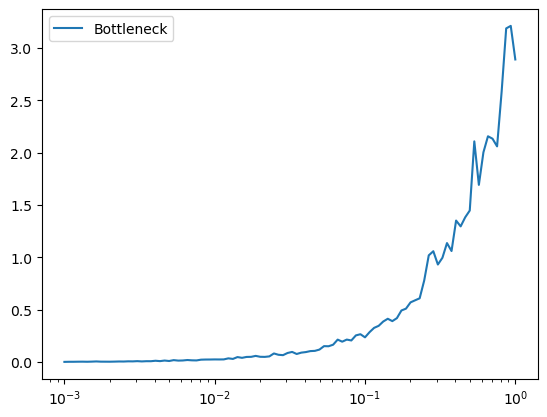

In [11]:
fig, ax = plt.subplots()
ax.set_xscale('log')
# ax.set_yscale('log')
ax.plot(noise_amplitudes, b_distances, label="Bottleneck")
# ax.plot(noise_amplitudes, w_distances, label="Wassertein")
ax.legend()

## Computational cost

In [17]:
%timeit wasserstein_distance(pdgm_a, pdgms[2])

122 µs ± 1.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%timeit bottleneck_distance(pdgm_a, pdgms[2])

4.08 ms ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Cadence

In [31]:
n_points = 2000
t = np.linspace(0, 5, n_points)
serie = np.cos(2*np.pi*t) + t

# dm -> distance_matrix
w_cadence = []
b_cadence = []
pdgms_cadence = []
dm_a = sparse_matrix_serie(serie)
pdgm_a = pd_from_distance_matrix(dm_a)
# remove point at infinity before computing distances
pdgm_a = pdgm_a[np.isfinite(pdgm_a[:, 1]), :]

removal_percentage = np.linspace(0, 95, 50)

for percentage in removal_percentage:
    
    
    new_serie = change_cadence(serie, percentage/100.)

    print(f"[{new_serie.shape}] Remove {percentage} % of points", end="\r")

    dm_b = sparse_matrix_serie(new_serie)
    pdgm_b = pd_from_distance_matrix(dm_b)
    pdgm_b = pdgm_b[np.isfinite(pdgm_b[:, 1]), :]
    pdgms_cadence.append(pdgm_b)
    w_cadence.append(wasserstein_distance(pdgm_a, pdgm_b))
    b_cadence.append(bottleneck_distance(pdgm_a, pdgm_b))

    

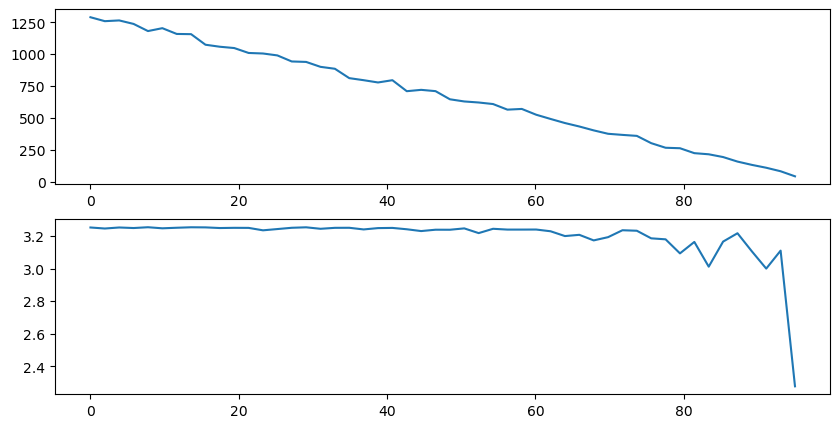

In [32]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
axs[0].plot(removal_percentage, w_cadence, label="wassertein")
axs[1].plot(removal_percentage, b_cadence, label="bottlenec")


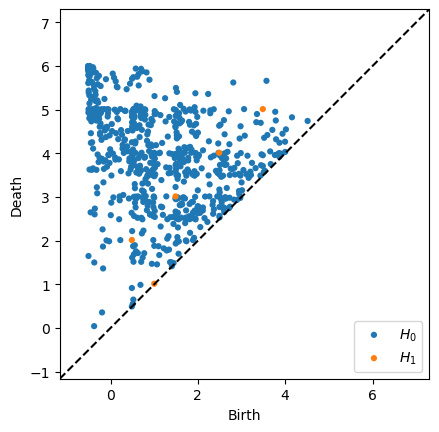

In [35]:
plot_diagrams([pdgms_cadence[0], pdgm_a])

In [ ]:
new_serie = change_cadence(serie, 20/100.)
